In [1]:
# customer_clustering.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

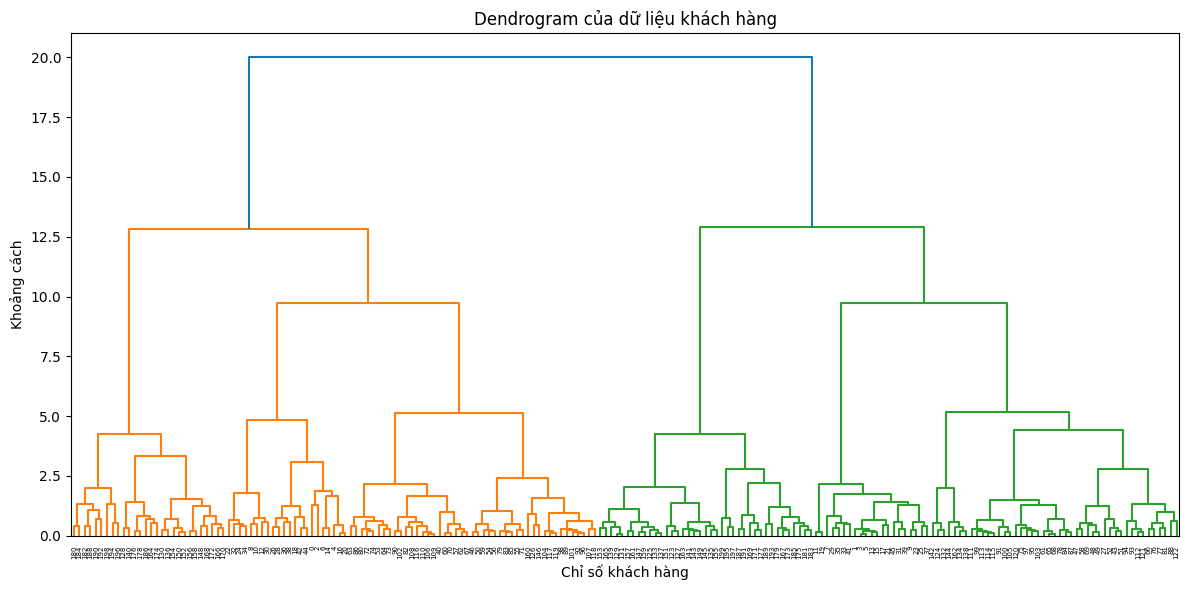

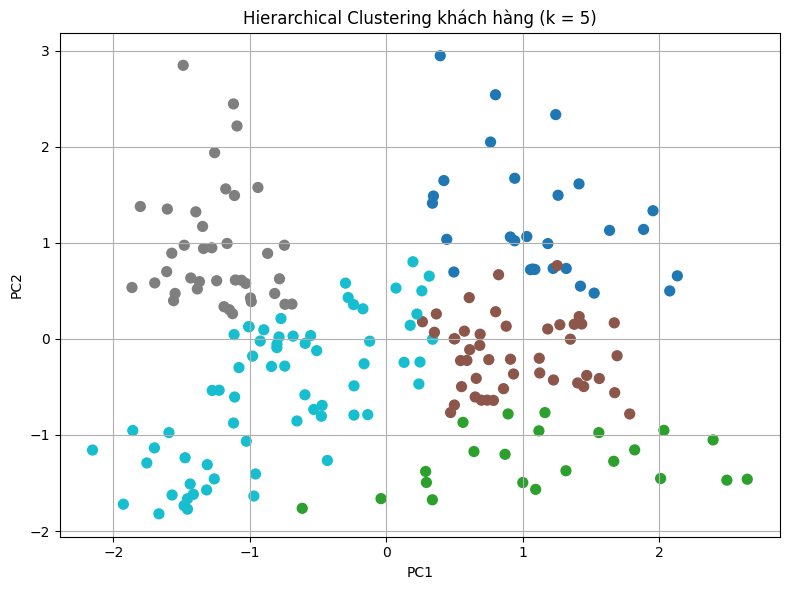

In [2]:

# 1. Đọc dữ liệu CSV
df = pd.read_csv('Mall_Customers.csv')

# 2. Chọn các thuộc tính số để phân cụm
# Có thể chọn: Age, Annual Income (k$), Spending Score (1-100)
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# 3. Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Tính linkage và vẽ dendrogram
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title("Dendrogram của dữ liệu khách hàng")
plt.xlabel("Chỉ số khách hàng")
plt.ylabel("Khoảng cách")
plt.tight_layout()
plt.show()

# 5. Phân cụm (ví dụ: 5 nhóm khách hàng)
k = 5
clusters = fcluster(Z, k, criterion='maxclust')

# 6. Giảm chiều bằng PCA (2D để trực quan)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 7. Trực quan hóa kết quả phân cụm
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', s=50)
plt.title(f"Hierarchical Clustering khách hàng (k = {k})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()
